In [1]:
import pandas as pd
import numpy as np
from core import DataLoader
import warnings

warnings.filterwarnings("ignore")

In [2]:
Christianity = DataLoader('../data/christianity')

In [3]:
Judaism = DataLoader('../data/judaism')

In [4]:
users = Christianity._users_df.copy()

In [15]:
# data["column_name"] = data["column_name"].apply(lambda x: x.replace("characters_need_to_replace", "new_characters"))


In [14]:
users['Location'].unique()

array(['on the server farm', 'Corvallis, OR', 'Winston-Salem, NC', ...,
       'Jahnstraße 2, 65843 Sulzbach, Hessen', 'Hồ Chí Minh',
       '366 N Broadway, Spam # 410 Jericho, NY 11753'], dtype=object)

In [16]:
'United Kingdom' in users['Location'].unique()

False

In [22]:
def calculate_years_for_tags(data, tags):
    posts = data._posts_df.set_index('Id')
    post_history = data._postHistory_df.set_index('PostId')
    df = posts.merge(post_history, left_on='Id', right_on='PostId', how='inner', suffixes=('Posts', 'History'))
    posts_with_tags = df[df.Tags.str.contains('|'.join(tags), na=False)]
    posts_with_tags.CreationDate = pd.to_datetime(posts_with_tags.CreationDatePosts)
    result = pd.DataFrame({
        'CreationYear': posts_with_tags.CreationDate.dt.year})
    return result

<AxesSubplot:xlabel='CreationYear'>

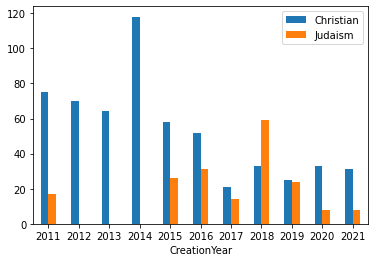

In [23]:
tags = ['<homosexuality>']

chris = calculate_years_for_tags(Christianity, tags)
chris = chris.groupby(['CreationYear'])['CreationYear'].size()

jud = calculate_years_for_tags(Judaism, tags)
jud = jud.groupby(['CreationYear'])['CreationYear'].count()

result = pd.DataFrame({'Christian': chris, 'Judaism': jud})

result.plot.bar(rot=0)

In [72]:
def calculate_countries_for_tags_at_year(data, tags, year, n_countries):
    users = pd.concat([Christianity._users_df, Judaism._users_df], sort=False)
    countries = [c for c in calculate_countries(users, n_countries) if type(c) == str]
    print(countries)

    posts = data._posts_df.set_index('OwnerUserId')
    users = data._users_df.set_index('Id')
    users = standardize_countries(users)
    
    df = posts.merge(users, left_on='OwnerUserId', right_on='Id', how='inner', suffixes=('Posts', 'Users'))
    df.CreationDatePosts = pd.to_datetime(df.CreationDatePosts)
    
    print()
    
    posts_with_tags = df[df.Tags.str.contains('|'.join(tags), na=False) & (df.Location.str.contains('|'.join(countries), na=False)) & (df.CreationDatePosts.dt.year == year)]
    result = pd.DataFrame({
        'Country': posts_with_tags.Location})

    return result

In [63]:
def calculate_countries(users, n_countries):
    users = standardize_countries(users)
    s = users.groupby(['Location']).size()
    d = pd.DataFrame({'Country': s.index, 'Number': s.values})
    d = d.sort_values(by=['Number'], ascending=False)
    
    return d['Country'][:n_countries]
    
    # users['Number'] = users.groupby(['Location'])['Location'].transform('count')
    users = users.merge(d, on='Location')
    users = users.sort_values(by=['Number'], ascending=False)
    countries = pd.DataFrame({
        'Country': users.Location,
        'Number': users.Number
    })
    return countries['Country'][0:n_countries]

In [89]:
def standardize_countries(users):
    aliases = {
        'USA': ['USA', 'US', 'United States'],
        'UK': ['UK', 'United Kingdom', 'GB', 'Great Britain'],
        'Israil': ['Israil', 'Israel'],
        'France': ['France'],
        'Germany': ['Germany'],
        'India': ['India'],
        'Thailand': ['Thai'],
        'Indonesia': ['Indonesia'],
        'Brazil': ['Brazil'],
        'Australia': ['Australia'],
        'Canada': ['Canada'],
        'Poland': ['Poland'],
        'Russia': ['Russia'],
    }
    
    for alias, names in aliases.items():
        for country in names:
            users['Location'] = users['Location'].apply(lambda x: alias if x and country in str(x) else x)
            # users[users['Location'].str.contains(country, na=False)]['Location'] = alias

    users['Location'] = users['Location'].apply(lambda x: x[x.rindex(','):].replace(',', '').replace(' ', '') if type(x) == str and ',' in x else x)
    
    return users
            

['USA', 'India', 'UK', 'Canada', 'Israil', 'Australia', 'Germany', 'Indonesia', 'CA', 'Thailand', 'Brazil', 'France', 'NY', 'TX', 'ViệtNam', 'Philippines', 'Vietnam', 'Netherlands', 'WA', 'SouthAfrica', 'Nigeria', 'PA', 'Poland', 'California', 'Russia', 'IL', 'Texas', 'Italy', 'Earth', 'Switzerland', 'FL', 'Sweden', 'Singapore', 'Brasil', 'Pakistan', 'South Africa', 'Romania', 'OH', 'NC', 'Portugal', 'GA', 'China', 'CO', 'MO', 'Ukraine', 'Kenya', 'Deutschland', 'MA', 'MI', 'NewZealand', 'Ireland', 'UT', 'Turkey', 'Spain', 'Mexico', 'New Zealand', 'Belgium', 'VA', 'OR', 'New Jersey', 'Japan', 'Florida', 'Utah', 'Bangladesh', 'Norway', 'Pennsylvania', 'TN', 'Egypt', 'MN', 'Finland', 'Ohio', 'Czech Republic', 'Argentina', 'MD', 'Việt Nam', 'Malaysia', 'Hungary', 'Denmark', 'England', 'London']

['USA', 'India', 'UK', 'Canada', 'Israil', 'Australia', 'Germany', 'Indonesia', 'CA', 'Thailand', 'Brazil', 'France', 'NY', 'TX', 'ViệtNam', 'Philippines', 'Vietnam', 'Netherlands', 'WA', 'SouthAfr

<AxesSubplot:xlabel='Country'>

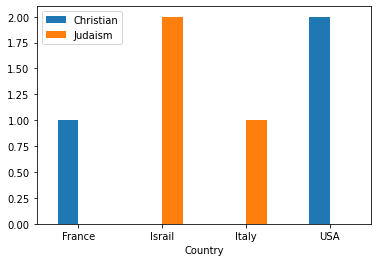

In [92]:
tags = ['<homosexuality>']
n_countries = 80
year = 2018

chris = calculate_countries_for_tags_at_year(Christianity, tags, year, n_countries)
chris = chris.groupby(by=chris.Country).size()

jud = calculate_countries_for_tags_at_year(Judaism, tags, year, n_countries)
jud = jud.groupby(by=jud.Country).size()

result = pd.DataFrame({'Christian': chris, 'Judaism': jud})

result.plot.bar(rot=0)

In [42]:
result

,Christian,Judaism
Country,,


In [90]:
users = standardize_countries(Christianity._users_df.copy())

In [93]:
list(users['Location'].unique())

['on the server farm',
 'OR',
 'NC',
 'USA',
 'UK',
 'Germany',
 'FL',
 'CA',
 'NY',
 None,
 'TN',
 'MO',
 'Switzerland',
 'South Africa',
 'Turkey',
 'South Carolina',
 'GA',
 'MA',
 'Florida',
 'California',
 'TX',
 'CO',
 'Finland',
 'Earth',
 'San Francisco',
 'WA',
 'KY',
 'Sweden',
 'Missouri',
 'Barbados',
 'IL',
 'Utah',
 'Tennessee',
 'Australia',
 'NewZealand',
 'Singapore',
 'Illinois',
 'Texas',
 'DE',
 'India',
 'WI',
 'Arizona',
 'Norway',
 'IE',
 'SouthAfrica',
 'Bulgaria',
 'LvivOblastUkraine',
 'Mexico',
 'Canada',
 'DC',
 'PA',
 'MD',
 'Virginia',
 'Louisiana',
 'NV',
 'Japan',
 'Addis Ababa',
 'nowhere',
 'ID',
 'https://www.gofundme.com/f/stop-stack-overflow-from-defaming-its-users',
 'OK',
 'VA',
 'Pennsylvania',
 'Serbia',
 'Hanoi',
 'MN',
 'Wisconsin',
 'Ohio',
 'NE',
 'Massachusetts',
 'Italy',
 'berlin.de',
 'Philippines',
 'WV',
 'Belgium',
 'Russia',
 'France',
 'Michigan',
 'Spain',
 'MI',
 'Schweiz',
 'Brazil',
 'Pencilveinea',
 'Netherlands',
 'NJ',
 'Irel